<a href="https://colab.research.google.com/github/RuvindiDilsara/ML_Feature_Engineering/blob/main/Label_3_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/Feature_Engineering"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


**Scale** the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  tr_df = train[train['label_2'].notna()] if target_label == 'label_2' else train
  vl_df = valid
  test_df = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = tr_df[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = vl_df[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_df[target_label]

In [9]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train[L3], y_train[L3])

SVC(kernel='linear')

In [10]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L3])
y_pred_test = clf.predict(x_test[L1])
print("Predicted labels before feature engineering", y_pred_test)

Predicted labels before feature engineering [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [11]:
print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L3], y_pred, average="weighted"))

[[142   0]
 [  1 607]]
0.9986666666666667
0.9986759906759908
0.9986666666666667


# LinearSVC

In [12]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel

# # Assuming L3 is an index or boolean mask for feature selection
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=10000).fit(x_train[L3], y_train[L3])

# model = SelectFromModel(lsvc, prefit=True)
# x_train_new = model.transform(x_train[L3])
# print(x_train_new.shape)


## Feature Engineering

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=100)
X_new = selector.fit_transform(x_train[L3], y_train[L3])
print("Shape: ", X_new.shape)

Shape:  (28520, 100)


In [14]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_new, y_train[L3])

SVC(kernel='linear')

In [15]:
y_pred = clf.predict(selector.transform(x_valid[L3]))
print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L3], y_pred, average="weighted"))

[[142   0]
 [  0 608]]
1.0
1.0
1.0


# PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L3])
x_train_trf = pd.DataFrame(pca.transform(x_train[L3]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L3]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28520, 67)


In [17]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_trf, y_train[L3])

SVC(kernel='linear')

In [18]:
y_pred = clf.predict(x_valid_trf)
print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L3], y_pred, average="weighted"))

[[141   1]
 [  0 608]]
0.9986666666666667
0.9986688560481665
0.9986666666666667


# SelectKBest with PCA

In [19]:
new_selector = SelectKBest(f_classif, k=50)
x_train_sb = new_selector.fit_transform(x_train[L3], y_train[L3])
x_valid_sb = new_selector.transform(x_valid[L3])
x_test_sb = new_selector.transform(x_test[L3])
print("Shape: ", x_train_sb.shape)

Shape:  (28520, 50)


In [20]:
new_pca = PCA(n_components=0.95, svd_solver='full')
new_pca.fit(x_train_sb)
x_train_pca = pd.DataFrame(new_pca.transform(x_train_sb))
x_valid_pca = pd.DataFrame(new_pca.transform(x_valid_sb))
x_test_pca = pd.DataFrame(new_pca.transform(x_test_sb))
print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 32)


In [21]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_pca, y_train[L3])

SVC(kernel='linear')

In [22]:
y_pred_sb_pca = clf.predict(x_valid_pca)
y_pred_sb_pca_test = clf.predict(x_test_pca)
print ("Predicted labels after feature engineering:", y_pred_sb_pca_test)
print (metrics.confusion_matrix(y_valid[L3], y_pred_sb_pca))
print (metrics.accuracy_score(y_valid[L3], y_pred_sb_pca))
print (metrics.precision_score(y_valid[L3], y_pred_sb_pca, average="weighted"))
print (metrics.recall_score(y_valid[L3], y_pred_sb_pca, average="weighted"))

Predicted labels after feature engineering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [23]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test,
    'Predicted labels after feature engineering': y_pred_sb_pca_test,
    'No of new features': x_test_pca.shape[1]
})

for i in range(256):
  if i < x_test_pca.shape[1]:
    output_df[f'new_feature_{i+1}'] = x_test_pca.iloc[:, i]
  else:
    output_df[f'new_feature_{i+1}'] = None

<ipython-input-23-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-23-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-23-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [24]:
output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,1,1,32,-3.111587,0.169388,1.957667,2.123426,-0.435279,-1.937396,-1.651270,...,None,None,None,None,None,None,None,None,None,None
1,1,1,32,-4.672789,-3.539205,4.280119,1.188169,-3.709309,-2.516878,2.331954,...,None,None,None,None,None,None,None,None,None,None
2,1,1,32,-2.524914,-3.369867,0.976637,2.674495,-2.385483,-1.897366,1.903285,...,None,None,None,None,None,None,None,None,None,None
3,1,1,32,-2.622502,-0.731435,1.469643,-0.668464,0.168002,-1.317778,3.126003,...,None,None,None,None,None,None,None,None,None,None
4,1,1,32,-2.338768,0.637565,4.527396,0.326658,-0.243638,-0.647482,0.283418,...,None,None,None,None,None,None,None,None,None,None


In [25]:

# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190140L_label_3.csv", index=False)

### Co-relation matrix


In [26]:
corr_matrix = x_train_pca.corr()
corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000e+00,-7.875878e-15,-1.180947e-16,1.927371e-16,1.058559e-16,-1.767757e-16,6.410735e-18,-3.313283e-16,-4.469642e-16,6.746235e-16,...,1.127370e-16,3.228245e-16,3.222486e-16,-1.194353e-16,4.108251e-16,-9.089975e-16,1.457479e-16,-5.630112e-16,1.271829e-16,8.285400e-16
1,-7.875878e-15,1.000000e+00,-2.278590e-17,8.353351e-17,3.182009e-16,2.352644e-16,-4.981800e-17,-3.186136e-16,1.464070e-17,1.056313e-16,...,-9.178015e-17,1.401708e-16,2.317749e-16,-4.170448e-16,1.447714e-16,3.647315e-16,-6.023317e-16,-6.705088e-16,4.943254e-16,3.160054e-16
2,-1.180947e-16,-2.278590e-17,1.000000e+00,1.518553e-16,-2.463066e-16,4.025141e-16,-8.050752e-18,3.460230e-16,1.874327e-16,1.721664e-16,...,1.828583e-16,4.115335e-18,1.874999e-16,-1.429237e-16,-4.790118e-16,1.041518e-16,4.260681e-16,-2.073470e-16,3.201555e-16,3.543777e-16
3,1.927371e-16,8.353351e-17,1.518553e-16,1.000000e+00,2.786806e-16,5.406420e-16,-2.012684e-16,-4.491748e-16,2.122842e-16,2.570704e-16,...,-1.690120e-16,-2.041214e-16,-9.080939e-18,3.114366e-16,1.085242e-16,-4.140862e-16,3.406357e-16,4.600823e-16,4.668192e-16,-1.490110e-16
4,1.058559e-16,3.182009e-16,-2.463066e-16,2.786806e-16,1.000000e+00,2.697101e-16,6.674537e-17,-1.029045e-15,-7.529727e-16,-3.858616e-16,...,-7.921862e-17,-8.120255e-16,-5.410485e-16,1.044844e-16,1.762659e-18,-2.977646e-16,6.501239e-17,-2.902717e-16,-2.916290e-16,1.702444e-16


<Axes: >

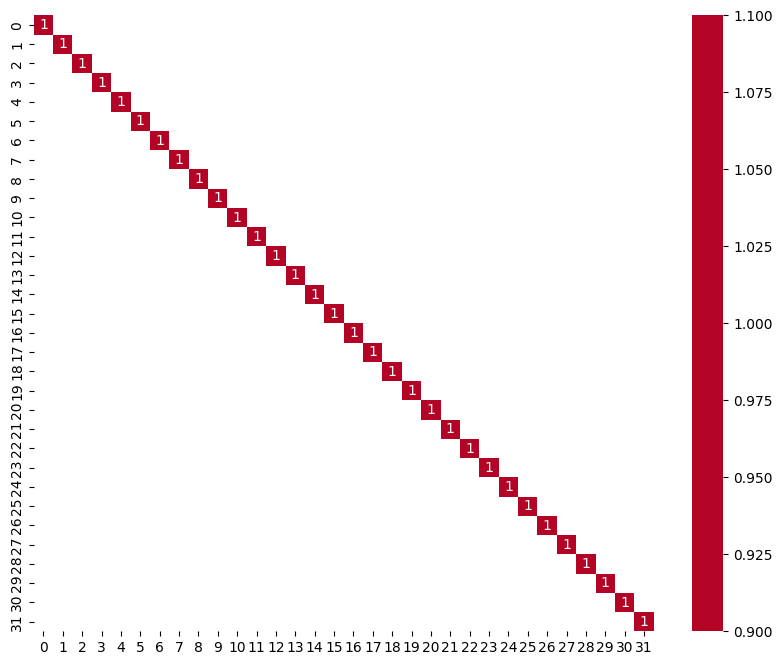

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)